Product Deep Dive: Who Are the True Money Makers?

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../data/online_retail_cleaned.csv', parse_dates=['InvoiceDate'])

print(f'Successfully loaded clean data. Total rows: {len(df)}')

Successfully loaded clean data. Total rows: 52933


Insight 2: Top 10 Bestsellers (by Quantity)

In [35]:
# Top 10 Bestsellers (by Quantity)
print('\n — — Top 10 Bestsellers by Quantity — -')
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


 — — Top 10 Bestsellers by Quantity — -


Description
MEDIUM CERAMIC TOP STORAGE JAR       74698
WORLD WAR 2 GLIDERS ASSTD DESIGNS     9419
GIN + TONIC DIET METAL SIGN           5016
ASSORTED COLOURS SILK FAN             4684
JUMBO BAG RED RETROSPOT               4671
PACK OF 72 RETROSPOT CAKE CASES       3561
MINI PAINT SET VINTAGE                3285
ASSORTED COLOUR BIRD ORNAMENT         2783
BROCADE RING PURSE                    2525
POPCORN HOLDER                        2508
Name: Quantity, dtype: int64

C:\Users\being\AppData\Local\Temp\ipykernel_10260\4210822826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


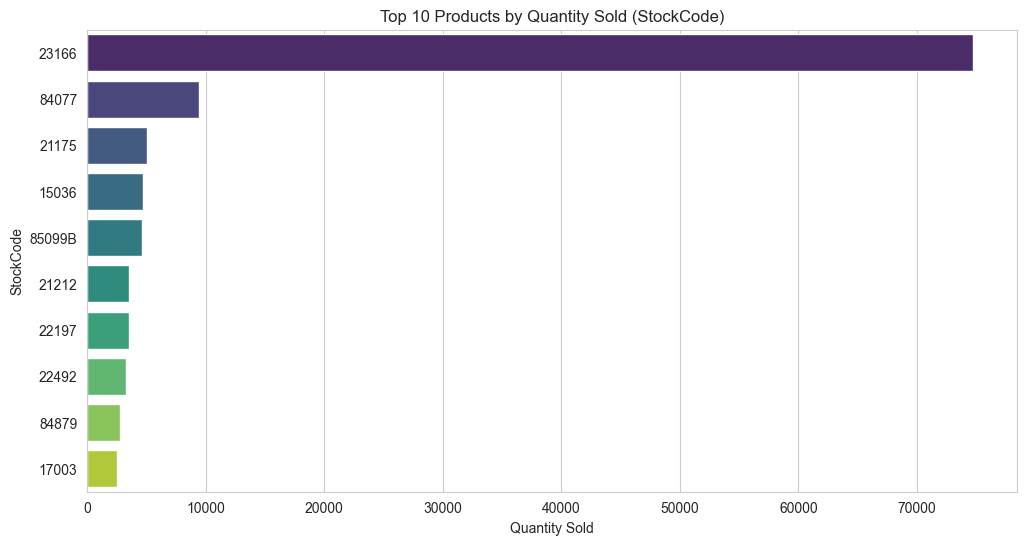

In [36]:
# Top 10 Products by Quantity
product_sales = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
top_products = product_sales.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold (StockCode)")
plt.xlabel("Quantity Sold")
plt.ylabel("StockCode")
plt.show()

Insight 3: Top 10 Revenue Drivers (The True Money-Makers)

In [37]:
# Top 10 Revenue Drivers (The True Money-Makers)
print('\n — — Top 10 Revenue Drivers (The True Money-Makers) — -')
df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)


 — — Top 10 Revenue Drivers (The True Money-Makers) — -


Description
MEDIUM CERAMIC TOP STORAGE JAR    77785.74
DOTCOM POSTAGE                    18456.13
REGENCY CAKESTAND 3 TIER          15093.38
AMAZON FEE                        13541.33
PARTY BUNTING                      9491.60
GIN + TONIC DIET METAL SIGN        9480.51
JUMBO BAG RED RETROSPOT            8996.65
Manual                             8966.96
CHILLI LIGHTS                      8395.20
POSTAGE                            7194.51
Name: Revenue, dtype: float64

Preparing for Time-Series Analysis: Feature Engineering

In [38]:
print('\n — — Time Series Feature Extraction — -')

# Extract Year, Month, DayName, and Hour from the InvoiceDate column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayName'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

print('New time features added: Year, Month, DayName, Hour.')
print(df[['InvoiceDate', 'Year', 'Month', 'DayName', 'Hour']].head())


 — — Time Series Feature Extraction — -
New time features added: Year, Month, DayName, Hour.
          InvoiceDate  Year  Month    DayName  Hour
0 2011-06-01 12:05:00  2011      6  Wednesday    12
1 2011-05-27 17:14:00  2011      5     Friday    17
2 2011-04-21 17:05:00  2011      4   Thursday    17
3 2011-11-16 10:39:00  2011     11  Wednesday    10
4 2011-03-10 08:40:00  2011      3   Thursday     8


Insight 4: Sales Trends by Month (Seasonality)

In [39]:
print('\n — — Insight 4: Sales Trends by Month (Seasonality) — -')

# Group by month and sum the revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)

print(monthly_revenue)


 — — Insight 4: Sales Trends by Month (Seasonality) — -
Month
11    143576.360
1     142013.420
12    133178.980
10    119533.540
9     103929.420
3      72968.270
8      71302.890
5      70424.510
6      68722.520
7      68713.831
4      51882.010
2      50178.730
Name: Revenue, dtype: float64


Insight 5: Sales Trends by Day of Week and Hour (Operational Planning)

In [40]:
print('\n — — Insight 4: Revenue by Day of Week — -')

# Group by DayName and sum the revenue
daily_revenue = df.groupby('DayName')['Revenue'].sum()

print(daily_revenue)


 — — Insight 4: Revenue by Day of Week — -
DayName
Friday       163861.320
Monday       171026.230
Sunday        83125.890
Thursday     219342.980
Tuesday      282796.741
Wednesday    176271.320
Name: Revenue, dtype: float64


Revenue by Hour of Day



In [41]:
print('\n — — Insight 4: Revenue by Hour of Day — -')

# Group by Hour and sum the revenue
hourly_revenue = df.groupby('Hour')['Revenue'].sum()

print(hourly_revenue)


 — — Insight 4: Revenue by Hour of Day — -
Hour
7       2830.910
8      26597.800
9      76768.750
10    209809.971
11    115233.600
12    142474.460
13    130348.290
14    119241.520
15    145178.980
16     70620.550
17     36148.030
18     14022.790
19      4397.130
20      2751.700
Name: Revenue, dtype: float64


Monthly Sales Trend

C:\Users\being\AppData\Local\Temp\ipykernel_10260\159564453.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate')['Revenue'].resample('M').sum()


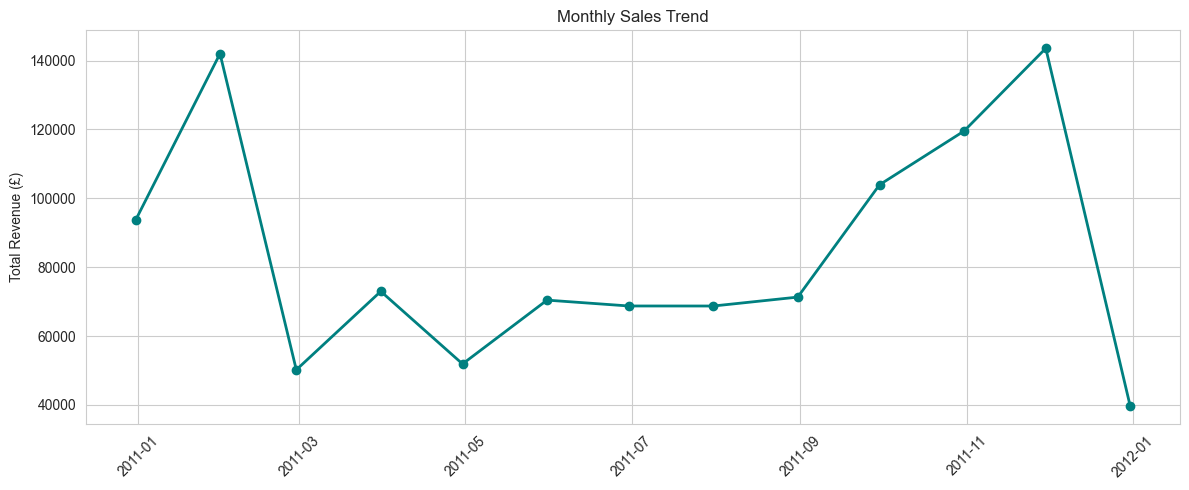

In [42]:
# Monthly Sales Trend
monthly_sales = df.set_index('InvoiceDate')['Revenue'].resample('M').sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.plot(monthly_sales, marker='o', color='teal', linewidth=2)
plt.title("Monthly Sales Trend")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weekly Sales Trend

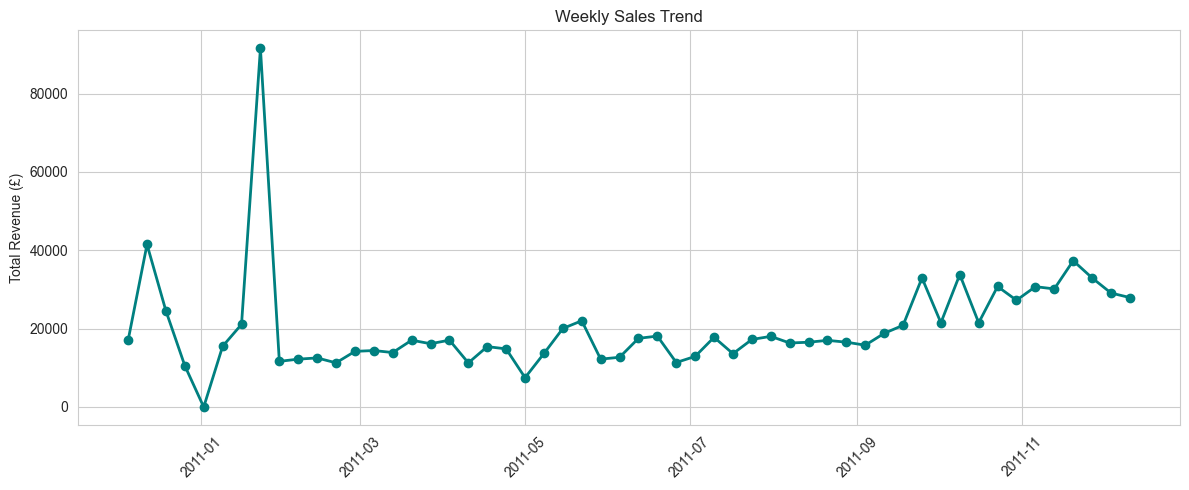

In [43]:
# Weekly Sales Trend
weekly_sales = df.set_index('InvoiceDate')['Revenue'].resample('W').sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.plot(weekly_sales, marker='o', color='teal', linewidth=2)
plt.title("Weekly Sales Trend")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

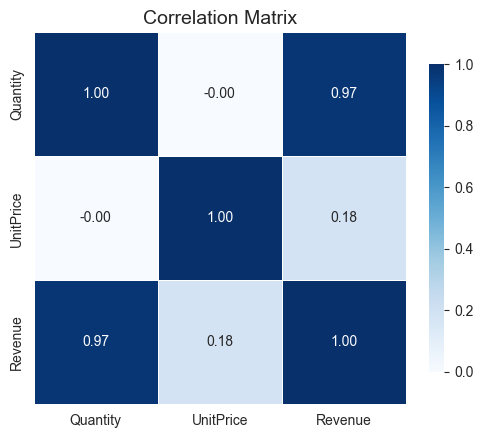

In [44]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity','UnitPrice','Revenue']].corr(),
            annot=True, fmt=".2f",
            cmap='Blues',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "alpha":0.8})
plt.title("Correlation Matrix", fontsize=14)
plt.show()

Note:  
* Revenue is strongly influenced by Quantity sold, while UnitPrice shows minimal impact, indicating a volume-driven sales pattern.

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,DayName,Hour
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,20.40,2011,6,Wednesday,12
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,27.80,2011,5,Friday,17
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2.60,2011,4,Thursday,17
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,5.85,2011,11,Wednesday,10
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,19.90,2011,3,Thursday,8


In [34]:
# Exporting cleaned version (2) for next notebook
df.to_csv('../data/online_retail_cleaned_v2.csv', index=False)